In [1]:
pip install imbalanced-learn pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load your CSV file
data = pd.read_csv('/Users/marwahamze/Desktop/Master_Data_Preprocessed.csv')

# Inspect the first few rows of your data
print(data.head())

# Check the class distribution
print(data['Binary_credit_mix'].value_counts())



   Month   Age  Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0      1  23.0        13.0       19114.12                  3                4   
1      2  24.0        13.0       19114.12                  3                4   
2      3  24.0        13.0       19114.12                  3                4   
3      4  24.0        13.0       19114.12                  3                4   
4      1  28.0        14.0       34847.84                  2                4   

   Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0              3          4.0                    3                     7.0   
1              3          4.0                    3                     9.0   
2              3          4.0                   -1                     4.0   
3              3          4.0                    4                     5.0   
4              6          1.0                    3                     1.0   

   ...  No Loan  Auto Loan  Credit-Builder L

In [4]:
X = data.drop(columns=['Binary_credit_mix'])  # Features
y = data['Binary_credit_mix']  # Target


In [10]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the oversampler
Random_oversampling = RandomOverSampler(sampling_strategy="not majority")

# Resample the data
resample_X, resample_y = Random_oversampling.fit_resample(X, y)

# Check the new class distribution
print(resample_y.value_counts())


Binary_credit_mix
1    21534
0    21534
Name: count, dtype: int64


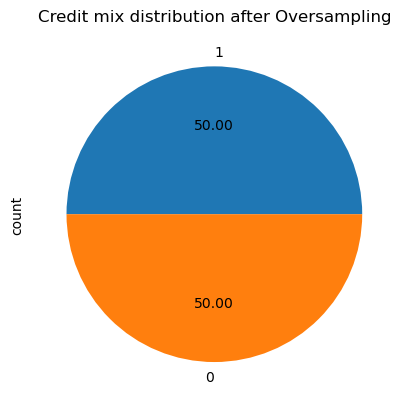

In [11]:
import matplotlib.pyplot as plt

# Plot the distribution
resample_y.value_counts().plot.pie(autopct='%.2f', labels=resample_y.unique())
plt.title("Credit mix distribution after Oversampling")
plt.show()


In [14]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the oversampler
Random_Undersampling = RandomUnderSampler(sampling_strategy="not minority")

# Resample the data
undersampling_X, undersampling_y = Random_Undersampling.fit_resample(X, y)

# Check the new class distribution
print(undersampling_y.value_counts())

Binary_credit_mix
0    10212
1    10212
Name: count, dtype: int64


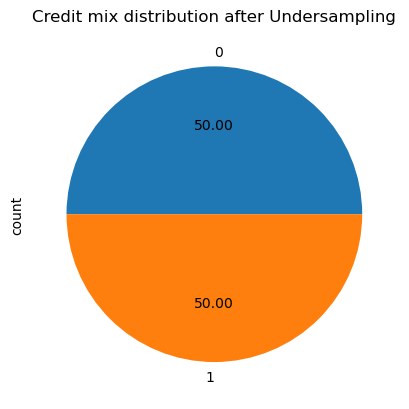

In [15]:
# Plot the distribution
resample_y.value_counts().plot.pie(autopct='%.2f', labels=undersampling_y.unique())
plt.title("Credit mix distribution after Undersampling")
plt.show()

In [29]:
# Check for missing values in the dataset
print(data.isnull().sum())


Month                            0
Age                              0
Occupation                      55
Annual_Income                    0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries           666
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly       1409
Payment_Behaviour                0
Monthly_Balance                348
Customer_ID_Number               0
Binary_credit_mix                0
Credit_History_Age_by_year     104
No Loan                          0
Auto Loan                        0
Credit-Builder Loan              0
Debt Consolidation Loan          0
Home Equity Loan                 0
Mortgage Loan                    0
Not Specified       

In [30]:
from sklearn.impute import SimpleImputer

# Initialize an imputer
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent'

# Impute missing values in X
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [31]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE
X_smote, y_smote = smote.fit_resample(X, y)

# Check the new distribution of 'credit mix'
print(pd.Series(y_smote).value_counts())


Binary_credit_mix
1    21534
0    21534
Name: count, dtype: int64


Dataset Overview:
   Month   Age  Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0      1  23.0        13.0       19114.12                  3                4   
1      2  24.0        13.0       19114.12                  3                4   
2      3  24.0        13.0       19114.12                  3                4   
3      4  24.0        13.0       19114.12                  3                4   
4      1  28.0        14.0       34847.84                  2                4   

   Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0              3          4.0                    3                     7.0   
1              3          4.0                    3                     9.0   
2              3          4.0                   -1                     4.0   
3              3          4.0                    4                     5.0   
4              6          1.0                    3                     1.0   

   ...  No Loan  Auto Loan

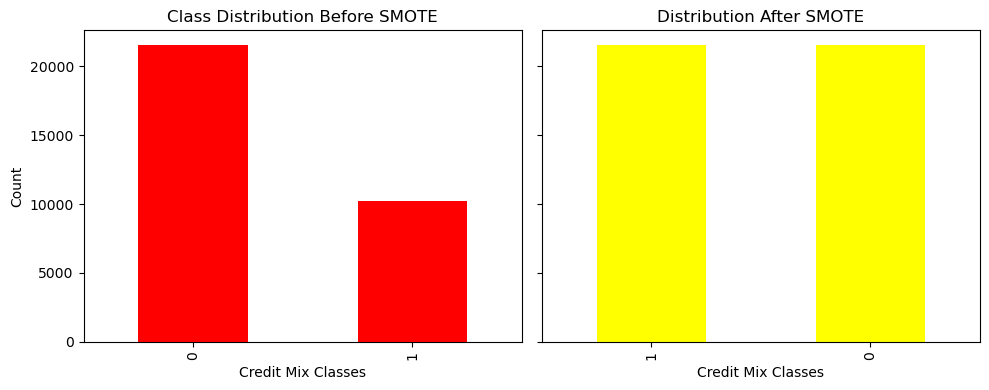

In [40]:
# Import necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/Users/marwahamze/Desktop/Master_Data_Preprocessed.csv')  # Replace 'your_file.csv' with your file name

# Inspect the dataset
print("Dataset Overview:")
print(data.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

#Fill missing values with mean/median/mode 
imputer = SimpleImputer(strategy='mean')  # You can also use median or mode

# Separate features and target
X = data.drop(columns=['Binary_credit_mix']) 
y = data['Binary_credit_mix']

# Impute missing values in features
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Check the shape of the dataset
print("\nShape of X and y:")
print(X.shape, y.shape)

# Check class distribution in the target variable
print("\nClass Distribution Before SMOTE:")
print(y.value_counts())

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to balance the dataset
smote_X, smote_y = smote.fit_resample(X, y)

# Convert y_smote to a pandas Series for easier analysis
smote_credit_mix = pd.Series(y_smote)

# Check class distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print(smote_credit_mix.value_counts())

# Save the balanced dataset to a new CSV file
balanced_data = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.DataFrame(smote_credit_mix, columns=['Binary_credit_mix'])], axis=1)
balanced_data.to_csv('creditmix_balanced_data.csv', index=False)
print("\nBalanced dataset saved as 'balanced_credit_mix_data.csv'.")

# Visualize class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Before SMOTE
y.value_counts().plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Credit Mix Classes')
axes[0].set_ylabel('Count')

# After SMOTE
smote_credit_mix.value_counts().plot(kind='bar', ax=axes[1], color='yellow')
axes[1].set_title('Distribution After SMOTE')
axes[1].set_xlabel('Credit Mix Classes')

plt.tight_layout()
plt.show()
